# Task Selection for MTEB(Multilingual)


In [1]:
from __future__ import annotations

import mteb

print(mteb.__version__)

/Users/au561649/.virtualenvs/mteb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.48


## Loading in data
We will start out by loading in the relevant data for the model and tasks of interests.

In [2]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [3]:
mult_tasks = mteb.get_tasks()
print(f"Number of tasks: {len(mult_tasks)}")

Number of tasks: 564


In [4]:
not_include = [
    "DKHateClassification",  # # due to it being a gated dataset on huggingface (requiring to sign a form)
    # was added after models were run
    "SouthAfricanLangClassification",
    "BrightRetrieval",
    "LitSearchRetrieval",
    "HinDialectClassification",
    "MSMARCO",
    "SpanishPassageRetrievalS2P",
    "SummEvalSummarization.v2",
    "IndicNLPNewsClassification",
    "XStance",
    "MIRACLReranking",
    "KorFin",
    "Ocnli",
    "Cmnli",
    "QBQTC",
    "SICK-BR-STS",
    "PublicHealthQA",  # some error in initial run of the dataset
    # model model had an error on this - likely contains empty examples:
    "YahooAnswersTopicsClassification",
    "FrenchBookReviews",
    "SlovakSumRetrieval",
    "LegalBenchPC",
    "RomanianSentimentClassification",
    "GPUSpeedTask",  # for speed testing
    "CPUSpeedTask",  # for speed testing
    "MSMARCOv2",  # too large to be practical for a benchmark
    "SIB200Classification",  # we will be using the SIB200 dataset for Cluster Classification so as they are the same dataset we will not include this one
    "SummEval",  # due to https://github.com/embeddings-benchmark/mteb/issues/1156
]
retrieval_to_be_downsampled = [  # TODO: Removing this list when tasks are ready
    "TopiOCQA",
    "MSMARCO-PL",
    "ClimateFEVER",
    "FEVER",
    "HotpotQA",
    "HotpotQA-PL",
    "DBPedia",
    "DBPedia-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NQ",
    "NQ-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "MIRACLRetrieval",
    "RiaNewsRetrieval",
    "Quora-PL",
    "QuoraRetrieval",
]
not_include += retrieval_to_be_downsampled

mult_tasks = [t for t in mult_tasks if t.metadata.name not in not_include]
# exlude machine translated tasks
mult_tasks = [
    t
    for t in mult_tasks
    if t.metadata.sample_creation
    not in [
        "machine-translated",
        "machine-translated and verified",
        "machine-translated and localized",
    ]
]

print(f"Number of tasks after filtering: {len(mult_tasks)}")

Number of tasks after filtering: 510


In [5]:
# load results from mteb/results repository
mteb_results = mteb.load_results(models=models, tasks=mult_tasks, download_latest=False)

In [6]:
import mteb.task_selection as task_selection

results_df = task_selection.results_to_dataframe(mteb_results, drop_na=False)

In [7]:
results_df.head()  # inspect the dataframe

,task,AFQMC,AILACasedocs,AILAStatutes,AJGT,ARCChallenge,ATEC,AfriSentiClassification,AfriSentiLangClassification,AllegroReviews,AlloProfClusteringP2P.v2,...,WikipediaRetrievalMultilingual,WinoGrande,WisesightSentimentClassification,XMarket,XNLI,XPQARetrieval,XQuADRetrieval,YelpReviewFullClassification,YueOpenriceReviewClassification,indonli
model,revision,,,,,,,,,,,,,,,,,,,,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.355864,0.35292,0.41800,0.809611,0.26677,0.408941,0.450786,0.931445,0.567694,0.671576,...,0.917722,0.53697,0.341335,0.259600,0.741047,0.506027,0.947917,0.650635,0.374902,0.555207
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.389854,0.36662,0.34535,0.823778,0.19001,0.428429,0.444763,0.921680,0.597813,0.691183,...,0.909265,0.39514,0.356845,0.287633,0.779189,0.474599,0.933592,0.618311,0.330566,0.579942
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.296610,0.26053,0.20371,0.777889,0.09611,0.370099,0.438023,0.671191,0.407753,0.631008,...,0.887509,0.56177,0.363027,0.167343,0.709983,0.415317,0.958011,0.597217,0.315869,0.509662
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.330127,0.26427,0.20842,0.802889,0.10828,0.398049,0.455005,0.642822,0.410437,0.636065,...,0.908209,0.54985,0.360570,0.171770,0.739017,0.472794,0.970637,0.643164,0.347949,0.517360
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.375337,0.33330,0.29659,0.854500,0.15027,0.432675,0.453874,0.914404,0.524254,0.669222,...,0.915935,0.54272,0.368923,0.256423,0.784905,0.518825,0.965380,0.652686,0.347656,0.561701


In [8]:
# which tasks are missing?
missing_tasks = results_df[results_df.isna().any(axis=1)]
missing_tasks = missing_tasks.loc[:, missing_tasks.isna().any()]
missing_tasks  # should be empty

,task
model,revision


# Task Selection

In this section we will do the task selection to construct a benchmark.

In [9]:
# tasks with exactly the same results for all models (i.e. columns where all values are the same)
same_results = results_df.loc[:, results_df.nunique() == 1]
same_results

,task,Diversity1LegalBenchClassification,Diversity2LegalBenchClassification,IFlyTek,TNews
model,revision,,,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.763333,0.746667,0.0,0.0
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.763333,0.746667,0.0,0.0
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.763333,0.746667,0.0,0.0
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.763333,0.746667,0.0,0.0
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.763333,0.746667,0.0,0.0
intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.763333,0.746667,0.0,0.0
sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.763333,0.746667,0.0,0.0
sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854,0.763333,0.746667,0.0,0.0
sentence-transformers/all-MiniLM-L6-v2,8b3219a92973c328a8e22fadcfa821b5dc75636a,0.763333,0.746667,0.0,0.0


In [10]:
same_results.columns

Index(['Diversity1LegalBenchClassification',
       'Diversity2LegalBenchClassification', 'IFlyTek', 'TNews'],
      dtype='object', name='task')

In [11]:
# remove these tasks from the tasks
print(f"Number of tasks before removing tasks with same results: {len(mult_tasks)}")
mult_tasks = [t for t in mult_tasks if t.metadata.name not in same_results.columns]
print(f"Number of tasks after removing tasks with same results: {len(mult_tasks)}")

Number of tasks before removing tasks with same results: 510
Number of tasks after removing tasks with same results: 506


In [12]:
licenses_to_remove = ["Not specified", "Unknown"]  # remove tasks with unknown licenses
# Note: this implicitly penalizes low-resource languages, as they are more likely to have unknown licenses - though this is probably still a reasonable choice
unspecified_licences = [
    t for t in mult_tasks if t.metadata.license in licenses_to_remove
]
[print(l) for l in unspecified_licences]
print("-")

TbilisiCityHallBitextMining(name='TbilisiCityHallBitextMining', languages=['eng', 'kat'])
BUCCBitextMiningFast(name='BUCC.v2', languages=['cmn', 'deu', 'eng', '...'])
LinceMTBitextMining(name='LinceMTBitextMining', languages=['eng', 'hin'])
RomaTalesBitextMining(name='RomaTalesBitextMining', languages=['hun', 'rom'])
HotelReviewSentimentClassification(name='HotelReviewSentimentClassification', languages=['ara'])
OnlineStoreReviewSentimentClassification(name='OnlineStoreReviewSentimentClassification', languages=['ara'])
TweetEmotionClassification(name='TweetEmotionClassification', languages=['ara'])
CzechSubjectivityClassification(name='CzechSubjectivityClassification', languages=['ces'])
DanishPoliticalCommentsClassification(name='DanishPoliticalCommentsClassification', languages=['dan'])
GermanPoliticiansTwitterSentimentClassification(name='GermanPoliticiansTwitterSentimentClassification', languages=['deu'])
AmazonPolarityClassification(name='AmazonPolarityClassification', languages=[

In [13]:
from mteb.benchmarks import MTEB_MAIN_EN

exceptions = [
    "STS16",
    "STS17",
    "STS22.v2",
    "SemRel24STS",
    "XNLI",  # assume that semrel task are fair use
    "LEMBNarrativeQARetrieval",
    "LEMBNeedleRetrieval",
    "LEMBPasskeyRetrieval",
    "LEMBQMSumRetrieval",
    "LEMBSummScreenFDRetrieval",
    "LEMBWikimQARetrieval",  # assume that LongEmbed tasks are fair use
    "TwentyNewsgroupsClustering.v2",
    "XNLI",
    "StackExchangeClusteringP2PFast",
    "BUCC.v2",
    "RedditClusteringP2P.v2",
    "RedditClustering.v2",
    "MLSUMClusteringP2P.v2",
    "MLSUMClusteringS2S.v2",
    "StackExchangeClusteringP2P.v2",
    "StackExchangeClustering.v2",
] + MTEB_MAIN_EN.tasks  # assume mteb tasks are fair use

remove_due_to_license = [
    t for t in unspecified_licences if t.metadata.name not in exceptions
]
remove_due_to_license = [t.metadata.name for t in remove_due_to_license]
remove_due_to_license

['TbilisiCityHallBitextMining',
 'LinceMTBitextMining',
 'RomaTalesBitextMining',
 'HotelReviewSentimentClassification',
 'OnlineStoreReviewSentimentClassification',
 'TweetEmotionClassification',
 'CzechSubjectivityClassification',
 'DanishPoliticalCommentsClassification',
 'GermanPoliticiansTwitterSentimentClassification',
 'ArxivClassification',
 'FrenkEnClassification',
 'PatentClassification',
 'PersianFoodSentimentClassification',
 'FilipinoHateSpeechClassification',
 'FrenkHrClassification',
 'IndonesianMongabayConservationClassification',
 'Itacola',
 'LanguageClassification',
 'MultilingualSentimentClassification',
 'TurkicClassification',
 'HateSpeechPortugueseClassification',
 'KinopoiskClassification',
 'RuSciBenchGRNTIClassification',
 'RuSciBenchOECDClassification',
 'FrenkSlClassification',
 'SpanishSentimentClassification',
 'SwedishSentimentClassification',
 'TurkishMovieSentimentClassification',
 'TurkishProductSentimentClassification',
 'YueOpenriceReviewClassificati

In [14]:
print(f"Number of tasks before: {len(mult_tasks)}")
mult_tasks = [t for t in mult_tasks if t.metadata.name not in remove_due_to_license]
print(f"Number of tasks after: {len(mult_tasks)}")

Number of tasks before: 506
Number of tasks after: 461


In [15]:
# remove legal bench tasks (These are English tasks focusing on legal documents)
legal_bench_tasks = [
    "CanadaTaxCourtOutcomesLegalBenchClassification",
    "ContractNLIConfidentialityOfAgreementLegalBenchClassification",
    "ContractNLIExplicitIdentificationLegalBenchClassification",
    "ContractNLIInclusionOfVerballyConveyedInformationLegalBenchClassification",
    "ContractNLILimitedUseLegalBenchClassification",
    "ContractNLINoLicensingLegalBenchClassification",
    "ContractNLINoticeOnCompelledDisclosureLegalBenchClassification",
    "ContractNLIPermissibleAcquirementOfSimilarInformationLegalBenchClassification",
    "ContractNLIPermissibleCopyLegalBenchClassification",
    "ContractNLIPermissibleDevelopmentOfSimilarInformationLegalBenchClassification",
    "ContractNLIPermissiblePostAgreementPossessionLegalBenchClassification",
    "ContractNLIReturnOfConfidentialInformationLegalBenchClassification",
    "ContractNLISharingWithEmployeesLegalBenchClassification",
    "ContractNLISharingWithThirdPartiesLegalBenchClassification",
    "ContractNLISurvivalOfObligationsLegalBenchClassification",
    "CorporateLobbyingLegalBenchClassification",
    "CUADAffiliateLicenseLicenseeLegalBenchClassification",
    "CUADAffiliateLicenseLicensorLegalBenchClassification",
    "CUADAntiAssignmentLegalBenchClassification",
    "CUADAuditRightsLegalBenchClassification",
    "CUADCapOnLiabilityLegalBenchClassification",
    "CUADChangeOfControlLegalBenchClassification",
    "CUADCompetitiveRestrictionExceptionLegalBenchClassification",
    "CUADCovenantNotToSueLegalBenchClassification",
    "CUADEffectiveDateLegalBenchClassification",
    "CUADExclusivityLegalBenchClassification",
    "CUADExpirationDateLegalBenchClassification",
    "CUADGoverningLawLegalBenchClassification",
    "CUADInsuranceLegalBenchClassification",
    "CUADIPOwnershipAssignmentLegalBenchClassification",
    "CUADIrrevocableOrPerpetualLicenseLegalBenchClassification",
    "CUADJointIPOwnershipLegalBenchClassification",
    "CUADLicenseGrantLegalBenchClassification",
    "CUADLiquidatedDamagesLegalBenchClassification",
    "CUADMinimumCommitmentLegalBenchClassification",
    "CUADMostFavoredNationLegalBenchClassification",
    "CUADNoSolicitOfCustomersLegalBenchClassification",
    "CUADNoSolicitOfEmployeesLegalBenchClassification",
    "CUADNonCompeteLegalBenchClassification",
    "CUADNonDisparagementLegalBenchClassification",
    "CUADNonTransferableLicenseLegalBenchClassification",
    "CUADNoticePeriodToTerminateRenewalLegalBenchClassification",
    "CUADPostTerminationServicesLegalBenchClassification",
    "CUADPriceRestrictionsLegalBenchClassification",
    "CUADRenewalTermLegalBenchClassification",
    "CUADRevenueProfitSharingLegalBenchClassification",
    "CUADRofrRofoRofnLegalBenchClassification",
    "CUADSourceCodeEscrowLegalBenchClassification",
    "CUADTerminationForConvenienceLegalBenchClassification",
    "CUADThirdPartyBeneficiaryLegalBenchClassification",
    "CUADUncappedLiabilityLegalBenchClassification",
    "CUADUnlimitedAllYouCanEatLicenseLegalBenchClassification",
    "CUADVolumeRestrictionLegalBenchClassification",
    "CUADWarrantyDurationLegalBenchClassification",
    "DefinitionClassificationLegalBenchClassification",
    "Diversity1LegalBenchClassification",
    "Diversity2LegalBenchClassification",
    "Diversity3LegalBenchClassification",
    "Diversity4LegalBenchClassification",
    "Diversity5LegalBenchClassification",
    "Diversity6LegalBenchClassification",
    "FunctionOfDecisionSectionLegalBenchClassification",
    "InsurancePolicyInterpretationLegalBenchClassification",
    "InternationalCitizenshipQuestionsLegalBenchClassification",
    "JCrewBlockerLegalBenchClassification",
    "LearnedHandsBenefitsLegalBenchClassification",
    "LearnedHandsBusinessLegalBenchClassification",
    "LearnedHandsConsumerLegalBenchClassification",
    "LearnedHandsCourtsLegalBenchClassification",
    "LearnedHandsCrimeLegalBenchClassification",
    "LearnedHandsDivorceLegalBenchClassification",
    "LearnedHandsDomesticViolenceLegalBenchClassification",
    "LearnedHandsEducationLegalBenchClassification",
    "LearnedHandsEmploymentLegalBenchClassification",
    "LearnedHandsEstatesLegalBenchClassification",
    "LearnedHandsFamilyLegalBenchClassification",
    "LearnedHandsHealthLegalBenchClassification",
    "LearnedHandsHousingLegalBenchClassification",
    "LearnedHandsImmigrationLegalBenchClassification",
    "LearnedHandsTortsLegalBenchClassification",
    "LearnedHandsTrafficLegalBenchClassification",
    "LegalReasoningCausalityLegalBenchClassification",
    "MAUDLegalBenchClassification",
    "NYSJudicialEthicsLegalBenchClassification",
    "OPP115DataRetentionLegalBenchClassification",
    "OPP115DataSecurityLegalBenchClassification",
    "OPP115DoNotTrackLegalBenchClassification",
    "OPP115FirstPartyCollectionUseLegalBenchClassification",
    "OPP115InternationalAndSpecificAudiencesLegalBenchClassification",
    "OPP115PolicyChangeLegalBenchClassification",
    "OPP115ThirdPartySharingCollectionLegalBenchClassification",
    "OPP115UserAccessEditAndDeletionLegalBenchClassification",
    "OPP115UserChoiceControlLegalBenchClassification",
    "OralArgumentQuestionPurposeLegalBenchClassification",
    "OverrulingLegalBenchClassification",
    "PersonalJurisdictionLegalBenchClassification",
    "PROALegalBenchClassification",
    "SCDBPAccountabilityLegalBenchClassification",
    "SCDBPAuditsLegalBenchClassification",
    "SCDBPCertificationLegalBenchClassification",
    "SCDBPTrainingLegalBenchClassification",
    "SCDBPVerificationLegalBenchClassification",
    "SCDDAccountabilityLegalBenchClassification",
    "SCDDAuditsLegalBenchClassification",
    "SCDDCertificationLegalBenchClassification",
    "SCDDTrainingLegalBenchClassification",
    "SCDDVerificationLegalBenchClassification",
    "TelemarketingSalesRuleLegalBenchClassification",
    "TextualismToolDictionariesLegalBenchClassification",
    "TextualismToolPlainLegalBenchClassification",
    "UCCVCommonLawLegalBenchClassification",
    "UnfairTOSLegalBenchClassification",
]
# ^ might be worth creating a benchmark for these tasks

print(f"Number of tasks before: {len(mult_tasks)}")
mult_tasks = [t for t in mult_tasks if t.metadata.name not in legal_bench_tasks]
print(f"Number of tasks after: {len(mult_tasks)}")

Number of tasks before: 461
Number of tasks after: 351


In [16]:
# remove code tasks
from mteb.abstasks.TaskMetadata import PROGRAMMING_LANGS

prog_langs = set(PROGRAMMING_LANGS)

code_tasks = [
    t.metadata.name for t in mult_tasks if set(t.metadata.languages) & prog_langs
]

print(f"Number of tasks before: {len(mult_tasks)}")
mult_tasks = [t for t in mult_tasks if t.metadata.name not in code_tasks]
print(f"Number of tasks after: {len(mult_tasks)}")

Number of tasks before: 351
Number of tasks after: 343


### Iterative Automated Task Selection 

In [17]:
# tasks with more than N eu languages

tasks_with_many_languages = [
    t for t in mult_tasks if len(set(t.metadata.languages)) > 5
]
tasks_with_many_languages

[BibleNLPBitextMining(name='BibleNLPBitextMining', languages=['aai', 'aak', 'aau', '...']),
 FloresBitextMining(name='FloresBitextMining', languages=['ace', 'acm', 'acq', '...']),
 IN22ConvBitextMining(name='IN22ConvBitextMining', languages=['asm', 'ben', 'brx', '...']),
 IN22GenBitextMining(name='IN22GenBitextMining', languages=['asm', 'ben', 'brx', '...']),
 IndicGenBenchFloresBitextMining(name='IndicGenBenchFloresBitextMining', languages=['asm', 'awa', 'ben', '...']),
 IWSLT2017BitextMining(name='IWSLT2017BitextMining', languages=['ara', 'cmn', 'deu', '...']),
 NTREXBitextMining(name='NTREXBitextMining', languages=['afr', 'amh', 'arb', '...']),
 NusaTranslationBitextMining(name='NusaTranslationBitextMining', languages=['abs', 'bbc', 'bew', '...']),
 NusaXBitextMining(name='NusaXBitextMining', languages=['ace', 'ban', 'bbc', '...']),
 TatoebaBitextMining(name='Tatoeba', languages=['afr', 'amh', 'ang', '...']),
 AfriSentiClassification(name='AfriSentiClassification', languages=['amh',

In [18]:
# tasks which should be kept, e.g. due to them being known high quality datasets, unique tasks, etc.
tasks_to_keep = [
    # dataset with good coverage of languages and of reasonable quality
    "WikipediaRerankingMultilingual",
    "MultiEURLEXMultilabelClassification",
    "BibleNLPBitextMining",
    "SIB200ClusteringS2S",
    "WikipediaRetrievalMultilingual",
    "MasakhaNEWSClassification",
]


def is_candidate_valid_removal(current_tasks: list[str], task_to_remove: str) -> bool:
    """Determine if target task should be removed.
    This checks that all task types are present in the current tasks or whether the task is in the tasks_to_keep list.
    This is all conducted within language.
    """
    if task_to_remove in tasks_to_keep:
        return False

    # check if removing task removes a unique task type - if so, don't remove
    _current_tasks = current_tasks.copy()
    if task_to_remove in _current_tasks:
        _current_tasks.remove(task_to_remove)
    task = mteb.get_task(task_to_remove)
    ctasks = mteb.get_tasks(tasks=_current_tasks)

    # don't remove a unique task type
    task_types = {t.metadata.type for t in ctasks}
    if task.metadata.type not in task_types:
        return False

    # check that removing the task does not remove a unique task type within the language
    _languages_covered_by_task_type = [
        t.metadata.languages for t in ctasks if t.metadata.type == task.metadata.type
    ]
    languages_covered_by_task_type = {
        lang for sublist in _languages_covered_by_task_type for lang in sublist
    }

    if not set(task.metadata.languages).issubset(languages_covered_by_task_type):
        return False

    return True

In [19]:
from sklearn.linear_model import LinearRegression

# remove tasks one by one
tasks_to_select_from = [t.metadata.name for t in mult_tasks]

tasks_removed = []
predicability_scores = []

while tasks_to_select_from:
    most_pred_tasks = task_selection.most_predictable_task(
        results_df[tasks_to_select_from],
        sklearn_estimator=LinearRegression(),
        metrics=[
            task_selection.spearman,
            task_selection.pearson,
            task_selection.mse_with_zscore,
        ],
    )

    # reverse the list to get the least predictable task
    most_pred_tasks.reverse()

    while most_pred_tasks:
        most_pred_task = most_pred_tasks.pop()
        most_pred_task_name = list(most_pred_task.keys())[0]

        # if the task is too hard to predict, skip it (this essentially stops the loop)
        if (
            most_pred_task[most_pred_task_name]["mse_with_zscore"] > 0.5
            or most_pred_task[most_pred_task_name]["spearman"] < 0.8
        ):
            continue

        if is_candidate_valid_removal(tasks_to_select_from, most_pred_task_name):
            tasks_to_select_from.remove(most_pred_task_name)
            tasks_removed.append(most_pred_task_name)
            predicability_scores.append(most_pred_task[most_pred_task_name])
            break

    if not most_pred_tasks:  # if no task was removed, then we are done -- can be replaced with another stopping criterion
        break

Task: STSB: 100%|██████████| 131/131 [00:02<00:00, 65.15it/s]                                    


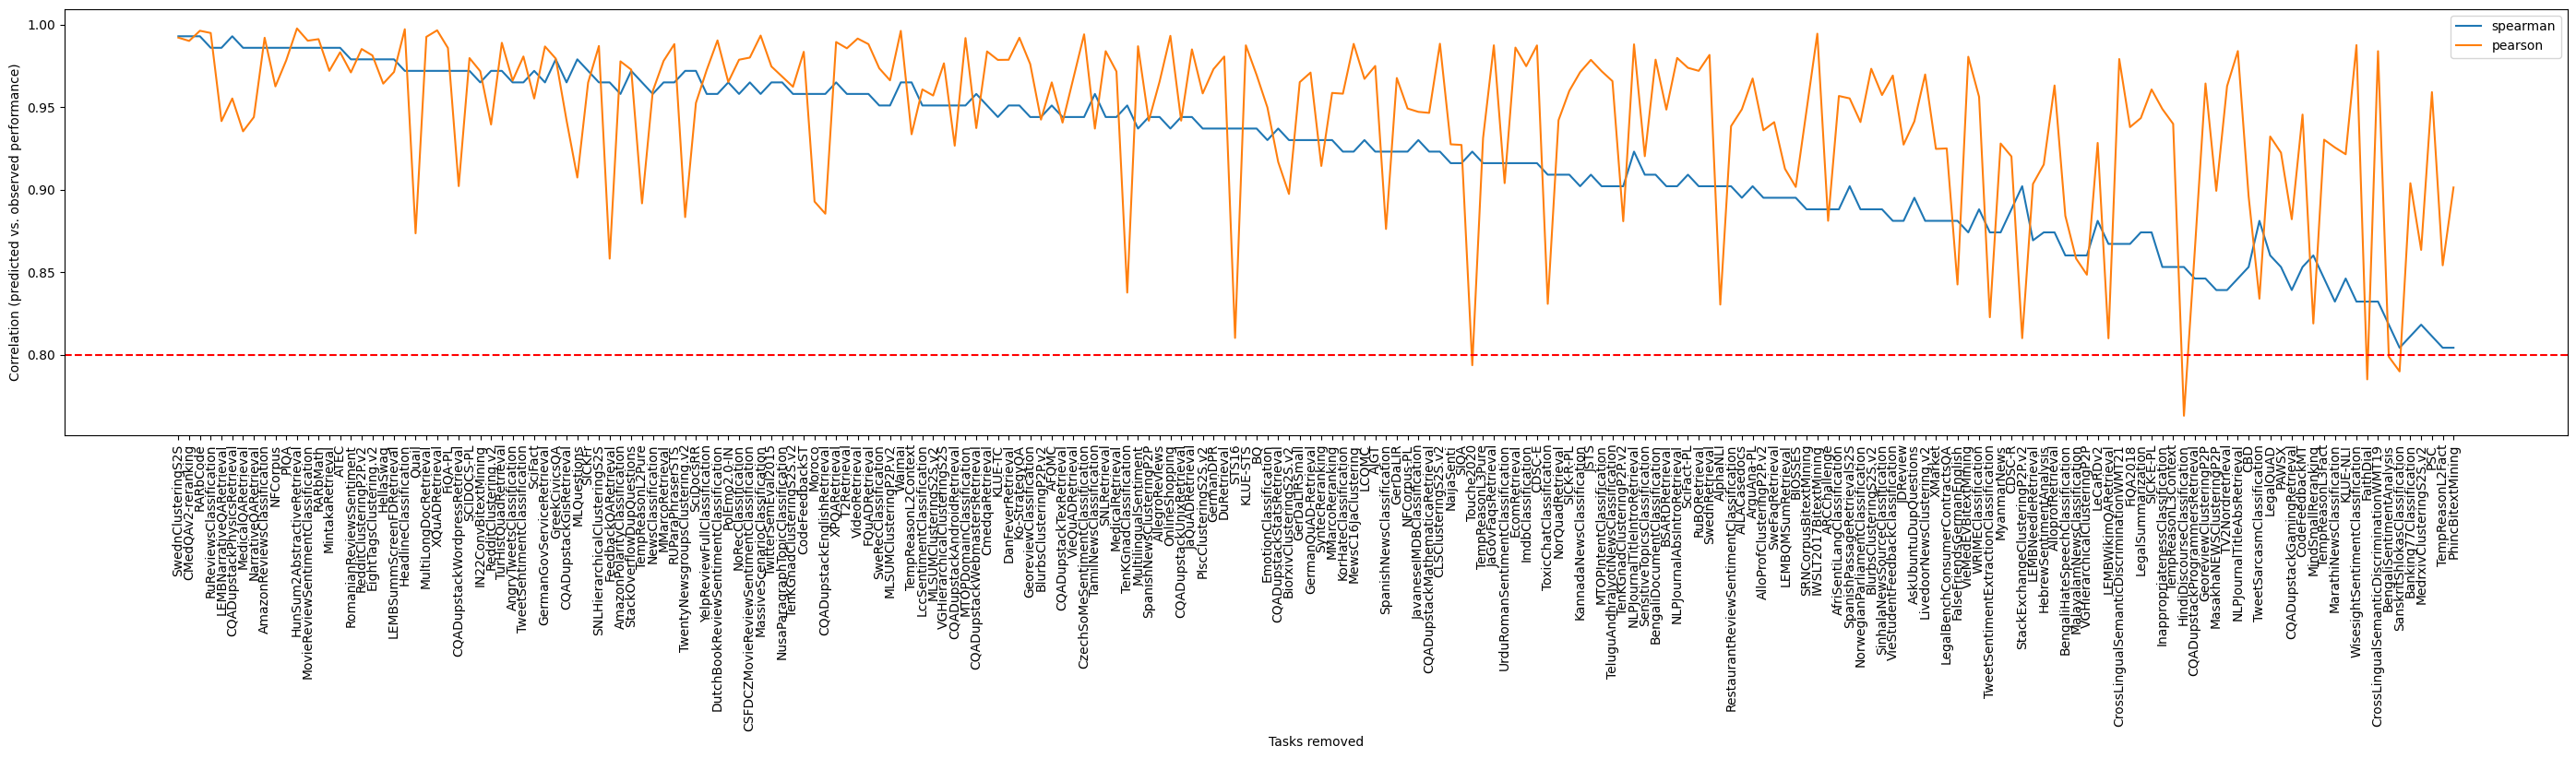

In [20]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

# make the plot wider
plt.figure(figsize=(35, 6))

for metric in ["spearman", "pearson"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Correlation (predicted vs. observed performance)")
plt.legend()

# add vline for 0.8 spearman
plt.axhline(y=0.8, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

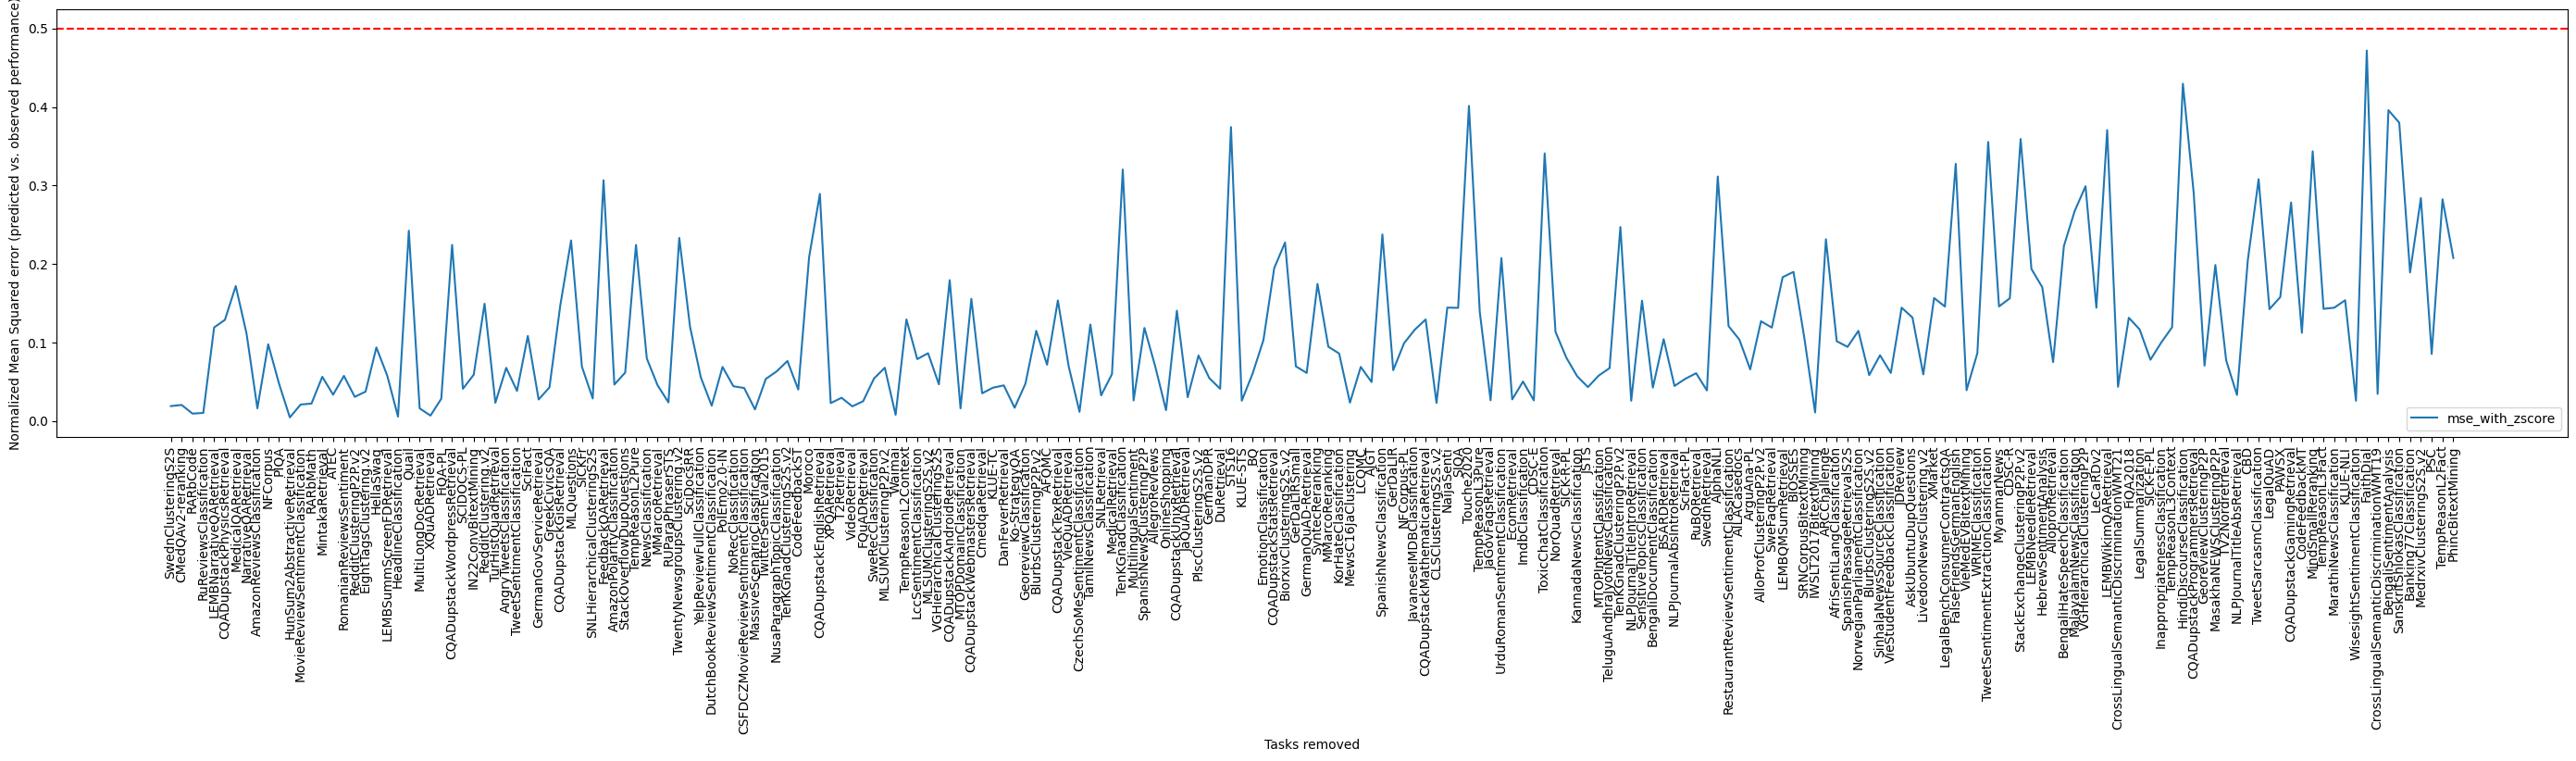

In [21]:
# plotting the predictability scores with the tasks removed

plt.figure(figsize=(35, 6))

for metric in ["mse_with_zscore"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Normalized Mean Squared error (predicted vs. observed performance)")
plt.legend()

# add vline for 0.5 mse
plt.axhline(y=0.5, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

## Constructing the Benchmark

In [22]:
# we now have the tasks:
tasks_to_select_from

['BornholmBitextMining',
 'BibleNLPBitextMining',
 'BUCC.v2',
 'DiaBlaBitextMining',
 'FloresBitextMining',
 'IN22GenBitextMining',
 'IndicGenBenchFloresBitextMining',
 'NollySentiBitextMining',
 'NorwegianCourtsBitextMining',
 'NTREXBitextMining',
 'NusaTranslationBitextMining',
 'NusaXBitextMining',
 'Tatoeba',
 'BulgarianStoreReviewSentimentClassfication',
 'CzechProductReviewSentimentClassification',
 'GreekLegalCodeClassification',
 'DBpediaClassification',
 'FinancialPhrasebankClassification',
 'PoemSentimentClassification',
 'ToxicConversationsClassification',
 'TweetTopicSingleClassification',
 'EstonianValenceClassification',
 'FilipinoShopeeReviewsClassification',
 'GujaratiNewsClassification',
 'SentimentAnalysisHindi',
 'IndonesianIdClickbaitClassification',
 'ItaCaseholdClassification',
 'KorSarcasmClassification',
 'KurdishSentimentClassification',
 'MacedonianTweetSentimentClassification',
 'AfriSentiClassification',
 'AmazonCounterfactualClassification',
 'CataloniaTwee

In [23]:
tasks = mteb.get_tasks(tasks=tasks_to_select_from)

# we can now create a benchmark
benchmark = mteb.Benchmark(
    name="MTEB(Multilingual)",
    tasks=tasks,
    description="Benchmark for evaluating document embedding models for European languages",
    citation="",
    reference="",
)

In [24]:
# create a dataframe with tasks
import pandas as pd

data = []

for t in tasks:
    data.append(
        {
            "Name": t.metadata.name,
            "Type": t.metadata.type,
            "Languages": set(t.metadata.languages),
            "Domains": t.metadata.domains,
            "License": t.metadata.license,
            "Description": t.metadata.description,
        }
    )

tasks_df = pd.DataFrame(data)
# tasks_df

# print all rows
pd.set_option("display.max_rows", 140)
_tasks_df = tasks_df.set_index(["Type", "Name"], inplace=False)
_tasks_df

Languages  \
Type                     Name                                                                                            
BitextMining             BornholmBitextMining                                                                    {dan}   
                         BibleNLPBitextMining                        {aoj, ncl, imo, acu, eko, urb, bvd, cab, bsp, ...   
                         BUCC.v2                                                             {deu, cmn, fra, rus, eng}   
                         DiaBlaBitextMining                                                                 {fra, eng}   
                         FloresBitextMining                          {kin, ita, zul, sin, kbp, khk, ast, ell, shn, ...   
                         IN22GenBitextMining                         {san, kas, mni, sat, mal, brx, pan, asm, tam, ...   
                         IndicGenBenchFloresBitextMining             {san, mup, mni, sat, bgc, hne, bho, nep, mal, ...   
                         NollySentiBitextMining                                              {yor, pcm, hau, ibo, eng}   
                         NorwegianCourtsBitextMining                                                        {nob, nno}   
                         NTREXBitextMining                           {kin, ita, zul, sin, swa, ell, slk, uig, mal, ...   
                         NusaTranslationBitextMining                 {bew, bbc, mad, sun, ind, min, bhp, jav, mak, ...   
                         NusaXBitextMining                           {bjn, bbc, mad, nij, ace, ind, min, bug, jav, ...   
                         Tatoeba                                     {ita, max, ast, ell, slk, nov, uig, mal, swh, ...   
Classification           BulgarianStoreReviewSentimentClassfication                                              {bul}   
                         CzechProductReviewSentimentClassification                                               {ces}   
                         GreekLegalCodeClassification                                                            {ell}   
                         DBpediaClassification                                                                   {eng}   
                         FinancialPhrasebankClassification                                                       {eng}   
                         PoemSentimentClassification                                                             {eng}   
                         ToxicConversationsClassification                                                        {eng}   
                         TweetTopicSingleClassification                                                          {eng}   
                         EstonianValenceClassification                                                           {est}   
                         FilipinoShopeeReviewsClassification                                                     {fil}   
                         GujaratiNewsClassification                                                              {guj}   
                         SentimentAnalysisHindi                                                                  {hin}   
                         IndonesianIdClickbaitClassification                                                     {ind}   
                         ItaCaseholdClassification                                                               {ita}   
                         KorSarcasmClassification                                                                {kor}   
                         KurdishSentimentClassification                                                          {kur}   
                         MacedonianTweetSentimentClassification                                                  {mkd}   
                         AfriSentiClassification                     {yor, kin, pcm, twi, ary, por, tso, arq, hau, ...   
                         AmazonCounterfactualClassification                        

In [25]:
_tasks_df.shape

(131, 4)

In [26]:
tasks_df.to_csv("mult_tasks.csv")

# Benchmark Performance

In [27]:
# load task results for the specified models from mteb/results repository
mteb_results = mteb.load_results(
    models=models, tasks=benchmark.tasks, download_latest=False
)

In [28]:
import mteb.task_aggregation as task_aggregation

mean = task_aggregation.mean(mteb_results)
weighted_mean = task_aggregation.task_category_weighted_mean(mteb_results)
borda = task_aggregation.borda_count(mteb_results)

In [29]:
import pandas as pd

data = []
for model_name, revisions in borda.items():
    for rev, avg_score in revisions.items():
        total_eval_time = sum(
            res.evaluation_time for res in mteb_results[model_name][rev]
        )

        data.append(
            {
                "model": model_name,
                "revision": rev,
                "mean": mean[model_name][rev],
                "weighted_mean": weighted_mean[model_name][rev],
                "borda_count": avg_score,
                "Total Evaluation time (hours)": total_eval_time / 3600,
            }
        )

df = pd.DataFrame(data)
df = df.sort_values("borda_count", ascending=False)
# round
df = df.round(3)
df

,model,revision,mean,weighted_mean,borda_count,Total Evaluation time (hours)
7,intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.634,0.552,1237.0,6.396
2,GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.610,0.537,1114.0,8.630
11,intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.601,0.528,1087.0,7.516
3,intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.587,0.514,972.0,7.339
9,intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.571,0.500,802.0,3.738
4,sentence-transformers/paraphrase-multilingual-...,79f2382ceacceacdf38563d7c5d16b9ff8d725d6,0.522,0.453,693.0,15.838
0,intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.555,0.488,645.0,2.686
1,sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.524,0.459,586.0,3.382
5,sentence-transformers/paraphrase-multilingual-...,bf3bf13ab40c3157080a7ab344c831b9ad18b5eb,0.490,0.426,471.0,2.626
6,sentence-transformers/all-mpnet-base-v2,84f2bcc00d77236f9e89c8a360a00fb1139bf47d,0.427,0.363,397.5,3.967
